# Final Model Testing

Here we will test the final `BalancedRandomForestClassifier` model that was tuned in the `ensemble.ipynb` notebook.

In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
from sklearn.metrics import recall_score, precision_score

In [2]:
def return_scores(estimator, X_train, X_test, y_train, y_test):
    estimator = estimator
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    train_pred = estimator.predict(X_train)
    test_pred = estimator.predict(X_test)

    train_recall = recall_score(y_train, estimator.predict(X_train))
    test_recall = recall_score(y_test, estimator.predict(X_test))

    train_prec = precision_score(y_train, train_pred)
    test_prec = precision_score(y_test, test_pred)

    df = pd.DataFrame({
        # 'Accuracy': [train_score, test_score],
        'Recall': [train_recall, test_recall],
        'Precision': [train_prec, test_prec]
    }, index=['Train', 'Test'])

    return df

In [4]:
with open('./data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test, balanced_rf_whole = pickle.load(f)

In [5]:
balanced_rf_whole.fit(X_train, y_train)

return_scores(balanced_rf_whole, X_train, X_test, y_train, y_test)

,Recall,Precision
Train,1.000000,0.427105
Test,0.891743,0.362957


## Whole Dataset Prediciton

In [6]:
X = pd.concat([X_train, X_test], axis=0)
X

,age,default,balance,housing,loan,day,campaign,duration_minutes,job_admin,job_blue-collar,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
26717,34,0,371,0,0,28,1,0.866667,False,False,...,False,False,False,True,False,False,False,False,False,False
38302,38,0,0,0,0,3,3,2.283333,False,False,...,False,False,False,False,False,True,False,False,False,False
34355,39,0,800,1,0,8,2,4.016667,False,False,...,False,False,False,False,False,False,False,True,False,False
2216,29,0,125,1,0,13,1,0.833333,False,True,...,False,False,False,False,False,False,False,True,False,False
29211,29,0,132,0,0,5,5,9.316667,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,36,0,1707,0,0,18,2,3.166667,False,True,...,False,False,False,False,False,True,False,False,False,False
17948,39,0,643,1,0,4,1,4.916667,False,False,...,True,False,False,False,False,False,False,False,False,False
11524,35,0,306,0,0,20,8,0.200000,False,True,...,False,False,False,False,False,True,False,False,False,False
23613,44,0,1240,1,0,18,1,1.466667,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
y = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)
y

0       0
1       0
2       0
3       0
4       0
       ..
7662    0
7663    0
7664    0
7665    0
7666    0
Length: 38335, dtype: int8

In [8]:
preds = balanced_rf_whole.predict(X)

print(f"Recall Score for whole dataset: {recall_score(y, preds)}")
print(f"Precision Score for whole dataset: {precision_score(y, preds)}")

Recall Score for whole dataset: 0.9788681948424068
Precision Score for whole dataset: 0.41409090909090907


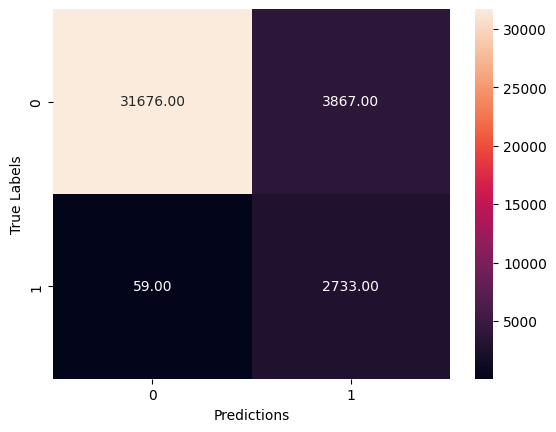

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y, preds), annot=True, fmt='.2f')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()